# DBSCAN 

After having mastered `Hierarchical clustering` and `K-Means` clustering models, it's time to finish our clustering journey with `DBSCAN`. 
We are going to use the same dataset we created in the `K-Means` tutorial

In [1]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)


def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()


Let's begin by importing the necessary libraries:

In [2]:
# import make_moons from sklearn
from sklearn.datasets import make_moons

# import DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')


We created the instance of `DBSCAN` class with a few parameters we didn't use before:

* `eps`: The maximum distance between two samples for one to be considered as being in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. It is the most important DBSCAN parameter to choose appropriately for our dataset and distance function.

* `min_samples`: The minimum number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

Now it's time to fit the data:


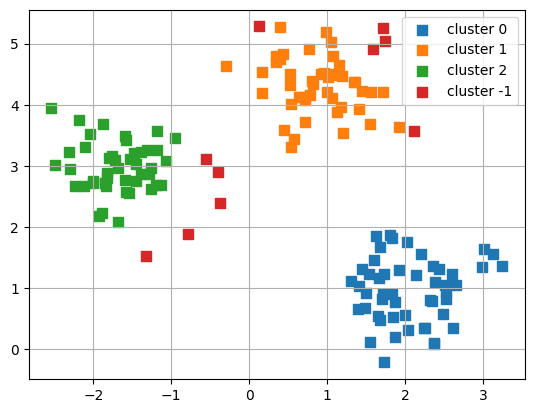

In [3]:
y_db = db.fit_predict(X)
plot_clusters(X,y_db)


> #### Excersice
> change the "metric" , "eps" and "min_samples" and see the difference

From the plot above, we can see how the `DBSCAN` algorithm assigned clusters to the data-points. The difference from the algorithms used in the previous sections is that `DBSCAN` also created a separate cluster for outliers. In the plot, the outliers are displayed as red squares.

## Non-spherical Data

In all the previously used examples, we used spherical-shape data in which all of the algorithms (`k-means`, `Agglomerative clustering`, and `DBSCAN`) performed almost identically well. But what happens when we try "moon-shaped" data? Let's find out:


In [4]:
# generate moon-shape data
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)


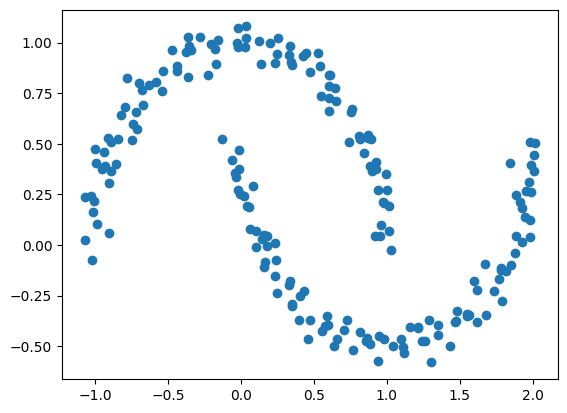

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()


From the plot, we can see that the data looks like two separate clusters, each of them moon-shaped.

But how will `k-means` perform on data like this?


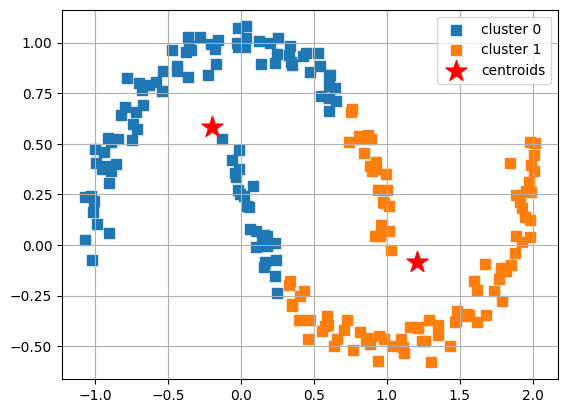

In [6]:
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10,
            random_state=0,)

y_km = km.fit_predict(X)

# plot K-means clusters
plot_clusters(X,y_km,plt_cluster_centers=True)


From the plot above, we can see that the result is not what we expected. The data is not separated into clusters well. 

Can we get a better result from `Agglomerative clustering`? Let's find out:


/Users/aparizi/opt/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


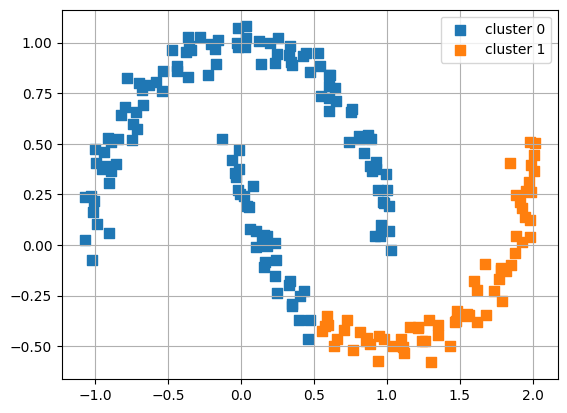

In [7]:
# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# fit Agglomerative clustering
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)
y_hc = ac.fit_predict(X)

# plot HC clusters
plot_clusters(X,y_hc)


The result is just as bad as with the `k-means` algorithm. In both cases, it is not our fault. We set the parameters correctly and did our best to get good results. It's nice to remember that **none of the clustering algorithms mentioned above can deal with non-spherical clusters**. 

Lastly, let's try `DBSCAN`:



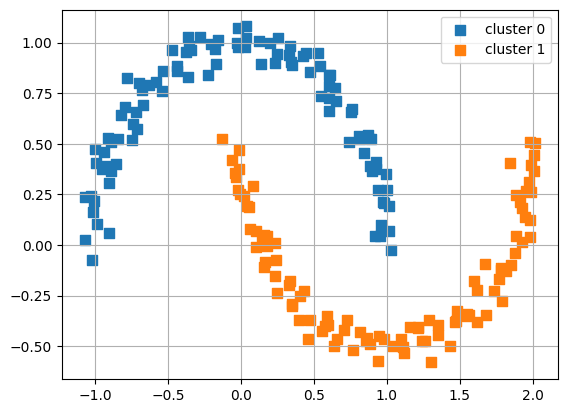

In [8]:
# fit DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

# plot DBSCAN clusters
plot_clusters(X,y_db)



Wow, finally the result is what we expected. The cluster separation now makes sense. What a relief...;)
